# Construcción de Modelos

# Objetivos
- Comprender la diferencia entre los conceptos de parámetro e hiperparámetro
- Aprender cómo se construyen, validan y evalúan correctamente los modelos
- Conocer técnicas de validación y evaluación de modelos

# Parámetros VS Hiperparámetros


## Concepto general de parámetro

De manera general, el concepto "parámetro" denota factores o límites que afectan la forma en la que algo de hace.

Del punto de vista matemático, un parámetro puede condicionar el desempeño de cierto modelo.

<center>
    <img src="figures/math-1.png" width="500" />
</center>

En el aprendizaje automático se diferencia entre parámetro e hiperparámetro.


## Diferencia entre parámetros e hiperparámetros

<br><center>
    <img src="figures/param-2.png" width="650"/>
</center>

## Ejemplo: regresión lineal 

Problema: tenemos con conjunto de datos X-Y y queremos interpolar una recta para predecir nuevos valores Y dado nuevos valores X
<center>
    <img src="figures/linear-regre.png" width="600"/>
</center>

&#10148; Sean $(x_{j}, y_{j})$ el conjunto de datos en cuestión

&#10148; Sean $\hat{y}_{j}$ los valores predichos por el modelo para los valores originales ${x}_{j}$

&#10148; El modelo se expresa matemáticamente como: 

\begin{align}
    \hat{y}_{j} = m{x}_{j} + c
\end{align}

&#10148; El error total que genera el modelo al predecir los datos originales se puede expresar:

\begin{align}
    E(m,c) = \frac{1}{n} \sum_{j=1}^{n} (y_{j} - \hat{y}_{j})^{2} = \frac{1}{n} \sum_{j=1}^{n} (y_{j} - ( m{x}_{j} + c) )^{2}
\end{align}

&#10148; En este caso $E(m,c)$ se conoce como función de costo (loss function)

&#10148; Gradiente descendente: función alcanza mínimo local en la dirección en que su gradiente desciende

&#10148; Se establecen valores iniciales de $m$ y $c$ para luego actualizarlos así: 

\begin{align}
    m_{k+1} = m_{k} - L \frac{\partial E(m,c)}{\partial m}
\end{align}

\begin{align}
    c_{k+1} = c_{k} - L \frac{\partial E(m,c)}{\partial c}
\end{align}

&#10148; $L$ se relaciona con la velocidad a la que nos acercamos al mínimo local (learning rate)

<center>
    <img src="figures/gradient-1.png" width="400"/>
</center>

&#10148; Las derivadas parciales con respecto a $m$ y $c$ son:

\begin{align}
    D_{m} = \frac{\partial E(m,c)}{\partial m} = \frac{2}{n} \sum_{j=0}^{n} (y_{j} - ( m{x}_{j} + c) ) (-x_{j})
\end{align}

\begin{align}
    D_{c} = \frac{\partial E(m,c)}{\partial c} = \frac{2}{n} \sum_{j=0}^{n} (y_{j} - ( m{x}_{j} + c) ) (-1)
\end{align}

&#10148; Por simplicidad las volvemos a expresar en términos de $\hat{y}$:

\begin{align}
    D_{m} = \frac{-2}{n} \sum_{j=0}^{n} (y_{j} - \hat{y}_{j} ) (x_{j})
\end{align}

\begin{align}
    D_{c} = \frac{-2}{n} \sum_{j=0}^{n} (y_{j} - \hat{y}_{j} )+ c) ) (-1)
\end{align}

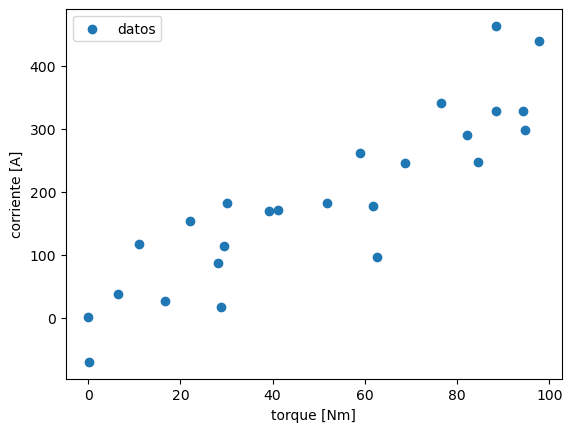

In [1]:
#en esta celda generamos datos al azar para el ejemplo de regresion lineal univariable
import matplotlib.pyplot as plt
import numpy as np

def generate_dataset_simple(beta, n, std_dev): #funcion para  crear datos al azar pseudo-lineales
    np.random.seed(23)
    x = np.random.rand(n)*100.
    e = np.random.randn(n) * std_dev
    y = x * beta + e
    return x, y

beta = 3.8
n = 25
std_dev=57.
x, y = generate_dataset_simple(beta, n, std_dev) #se genera el conjunto de datos
plt.scatter(x, y, label='datos')
plt.xlabel('torque [Nm]'), plt.ylabel('corriente [A]'),plt.legend()
plt.show()

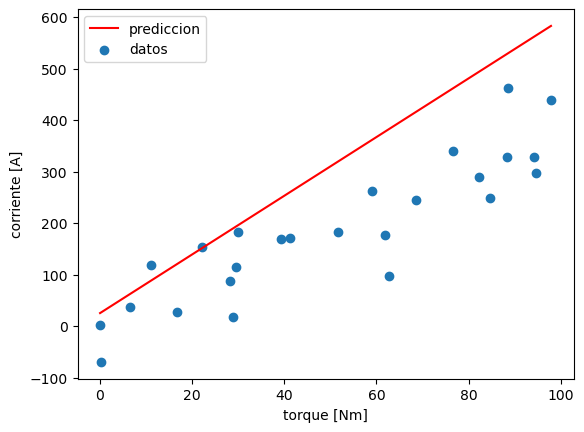

In [5]:
#en esta celda creamos un modelo inicial de regresion lineal univariable del tipo y=mx+c
m = 5.7 #valor inicial para m
c = 25. #valor inicial para c
ypred = m*x + c
plt.plot([min(x), max(x)], [min(ypred), max(ypred)], color='red', label='prediccion') #grafico linea
plt.scatter(x, y, label='datos')
plt.xlabel('torque [Nm]'), plt.ylabel('corriente [A]'), plt.legend()
plt.show()

In [7]:
#implementamos el algoritmo de gradiente descendente
def grad_desc(x, y, L, epochs, m, c):
    n = len(x)
    for i in range(epochs): 
        ypred = m*x + c  #prediccion actual de los valores y
        Dm = (-2/n) * sum(x * (y - ypred))  #derivada c/r m
        Dc = (-2/n) * sum(y - ypred)  #derivada c/r c
        m = m - L * Dm  #actualizar m
        c = c - L * Dc  #actualizar c
    return m, c

valores m y c =  2.943444776426361 56.007551747108465


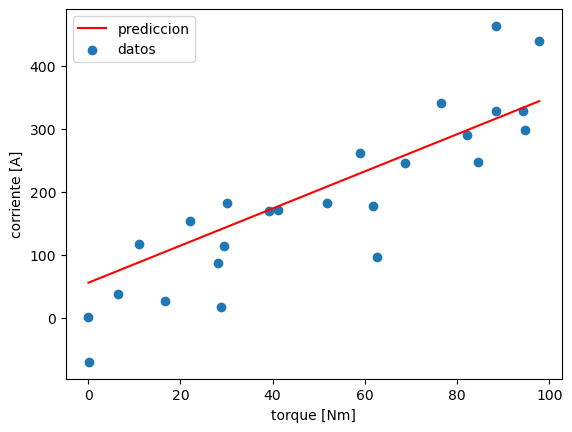

In [22]:
#usamos el gradiente descendente para mejorar el modelo

L = 1.e-4  #velocidad de aprendizaje
epochs = 10000  #numero de iteraciones
m = 7.7 #valor inicial para m
c = 100. #valor inicial para c
m, c = grad_desc(x, y, L, epochs, m, c)
print('valores m y c = ', m, c) #valores finales de m y c

ypred = m*x + c #volvemos a generar la prediccion con los nuevos m y c
plt.plot([min(x), max(x)], [min(ypred), max(ypred)], color='red', label='prediccion')
plt.scatter(x, y, label='datos')
plt.xlabel('torque [Nm]'), plt.ylabel('corriente [A]'), plt.legend()
plt.show()

**Entonces... ¿cuáles son los parámetros e hiperparámetros en el ejemplo?**

<center>
    <br> <img src="figures/example-gradient-descent.png" width="500"/>
</center>


# Construcción y validación de modelos

## Primera aproximación
Enfoque incompleto, ya que no hay evaluación del modelo con datos "aún" desconocidos.

<br>
<center>
    <img src="figures/training-0.png" width="800"/>
</center>


## Segunda aproximación
Mejor enfoque, pero aún incompleto ya que no hay una etapa de ajuste de hiperparámetros

<br>
<center>
    <img src="figures/train_test_2.png" width="700"/>
</center>


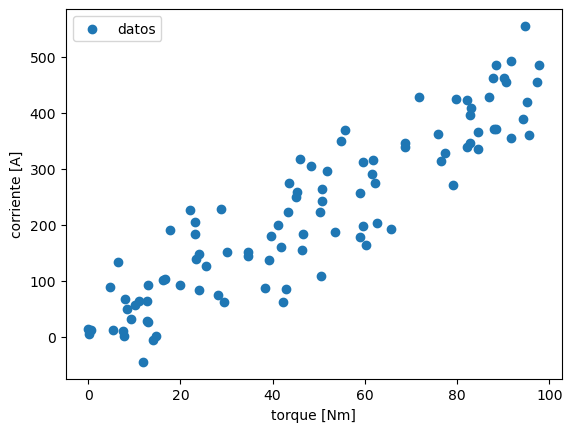

In [23]:
beta = 4.7
n = 100
std_dev=57.
x, y = generate_dataset_simple(beta, n, std_dev)
plt.scatter(x, y, label='datos')
plt.xlabel('torque [Nm]'), plt.ylabel('corriente [A]'), plt.legend()
plt.show()

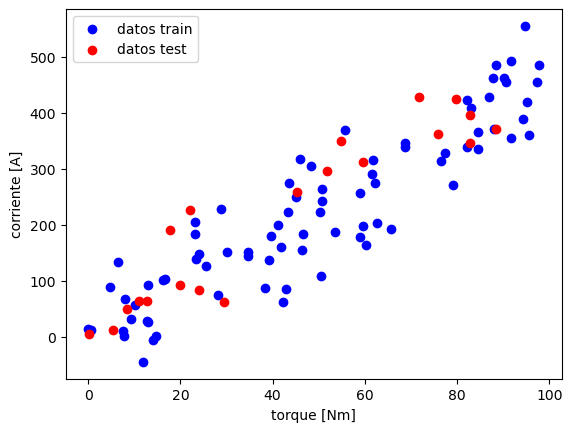

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

plt.scatter(x_train, y_train, label='datos train', color='blue')
plt.scatter(x_test, y_test, label='datos test', color='red')
plt.xlabel('torque [Nm]'), plt.ylabel('corriente [A]'), plt.legend()
plt.show()

valores m y c =  4.5073523880818405 0.9609972877539328


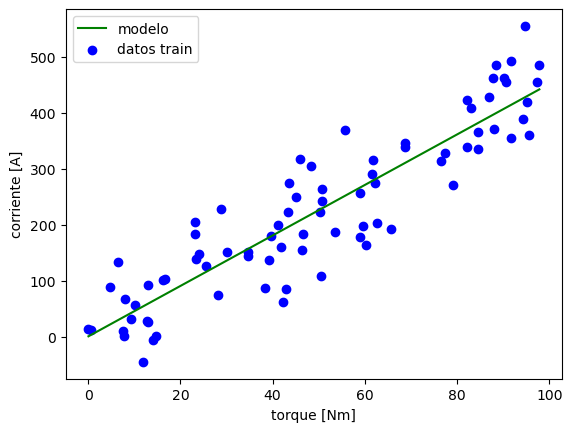

Error entrenamiento =  3644.0694430487542


In [42]:
L = 1.e-4
epochs = 1000
m = 2.7
c = 1.
m, c = grad_desc(x_train, y_train, L, epochs, m, c)
print('valores m y c = ', m, c)

y_train_pred = m*x_train + c
plt.plot([min(x_train), max(x_train)], [min(y_train_pred), max(y_train_pred)], color='green', label='modelo')
plt.scatter(x_train, y_train, label='datos train', color='blue')
plt.xlabel('torque [Nm]'), plt.ylabel('corriente [A]')
plt.legend(), plt.show()

print('Error entrenamiento = ', np.mean((y_train_pred - y_train)**2.0) )

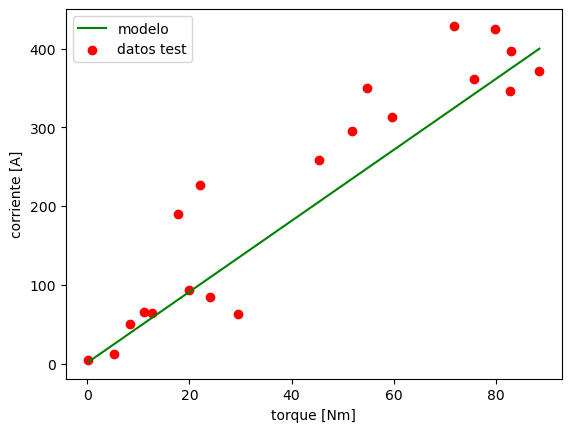

Error test =  3510.4213341960444


In [43]:
y_test_pred = m*x_test + c
plt.plot([min(x_test), max(x_test)], [min(y_test_pred), max(y_test_pred)], color='green', label='modelo')
plt.scatter(x_test, y_test, label='datos test', color='red')
plt.xlabel('torque [Nm]'), plt.ylabel('corriente [A]')
plt.legend(), plt.show()

print('Error test = ', np.mean((y_test_pred - y_test)**2.0) )

## Enfoque correcto
Procedimiento completo para entrenamiento, evaluación y ajuste de hiperparámetros (validación)

<br>
<center>
    <img src="figures/training1.png" width="850"/>
</center>


## Algunas técnicas para ajuste de hiperparámetros
- Búsqueda de malla (grid search)
- Búsqueda aleatoria (random search)
- Validación cruzada (cross-validation)

### Búsqueda de malla y aleatoria
Se realiza en el set de validación

<center>
<img src="figures/grid-random.png" width="800"/>
</center>



### Validación cruzada (cross-validation)

<br><center>
    <img src="figures/crossvalidation.png" width="700"/>
</center>


# Evaluación de modelos

## Subajuste y sobreajuste (underfitting and overfitting)

Qué tanto se ajusta el modelo a los datos de entrenamiento (error de entrenamiento)

<br>
<center>
<img src="figures/biasvariance1.png" width="900"/>
</center>


## Compensación sesgo-varianza (bias-variance tradeoff)

**Concepto de precisión**

<br><center>
    <img src="figures/prec-exac.png" width="600"/>
</center>

**Error de sesgo**: modelo tiene buena precisión, pero mala exactitud

**Error de varianza**: modelo tiene mala precisión, pero buena exactitud


<br><center>
    <img src="figures/biasvariance2.png" width="500"/>
</center>


**Sobreajuste**: Por intentar tener un error de entrenamiento muy bajo (error de sesgo bajo), se corre el riesgo de tener un error de validación (error de varianza) muy alto

**Subajuste**: Al intentar tener una varianza pequeña, se corre el riesgo de que el modelo no se ajuste bien a los datos de entrenamiento 

## Compensación sesgo-varianza según complejidad

<br>
<center>
    <img src="figures/biasvariance3.jfif" width="1200"/>
</center>


# Sumario
- Un parámetro es un valor interno del modelo que se obtiene en el proceso de entrenamiento.
- Un hiperparámetro es un valor externo del modelo que se define con anterioridad al entrenamiento.
- Para la construcción de modelos se deben considerar sets de datos para entrenamiento, eventual validación y evaluación.
- Hay métodos para ajustar los hiperparámetros como la búsqueda de malla o validación cruzada.